 `(Mohammad Reza Amiri 9926040)`
 `(Amir Hossein Ahmadi Ashtiani 9923501)`
 `(Mohammad Mahdi Norouzi 9923085)`

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

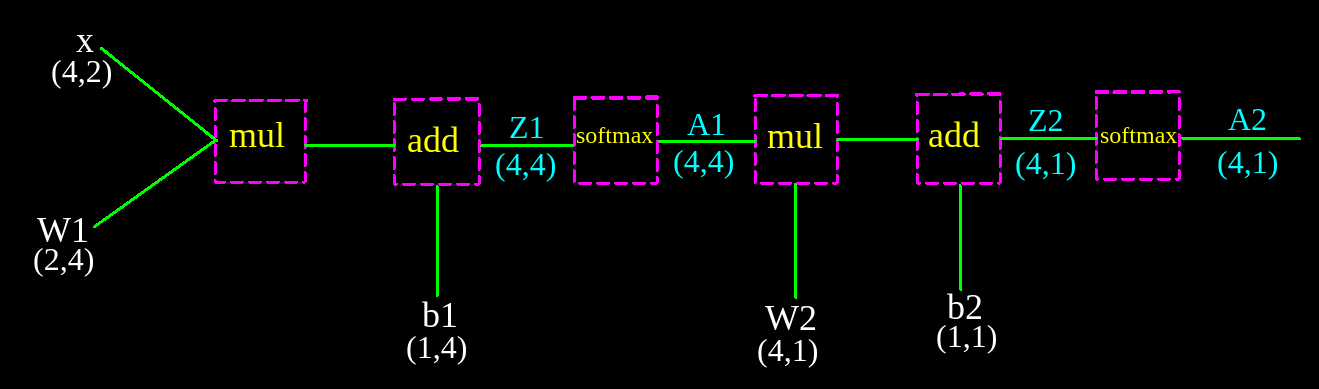

### 1. Gradient for the second layer (output layer):

$$
dZ_2 = (A_2 - Y) \odot \sigma'(Z_2)
$$

$$
dW_2 = \frac{1}{m} A_1^T \cdot dZ_2
$$

$$
db_2 = \frac{1}{m} \sum_{i=1}^{m} dZ_2^{(i)}
$$

### 2. Gradient for the first layer (hidden layer):

$$
dA_1 = dZ_2 \cdot W_2^T
$$

$$
dZ_1 = dA_1 \odot \sigma'(Z_1)
$$

$$
dW_1 = \frac{1}{m} X^T \cdot dZ_1
$$

$$
db_1 = \frac{1}{m} \sum_{i=1}^{m} dZ_1^{(i)}
$$

### 3. Updating weights and biases:

$$
W_1 = W_1 - \eta dW_1
$$

$$
b_1 = b_1 - \eta db_1
$$

$$
W_2 = W_2 - \eta dW_2
$$

$$
b_2 = b_2 - \eta db_2
$$


In [178]:
class deepNetwork:
    def __init__(self, input_size, hidden_size, output_size, typ='classify', learning_rate=0.01):
        # Initialize weights and biases for the first and second layer
        self.W1 = np.random.uniform(size=(input_size, hidden_size))
        self.b1 = np.random.uniform(size=(1, hidden_size))
        self.W2 = np.random.uniform(size=(hidden_size, output_size))
        self.b2 = np.random.uniform(size=(1, output_size))
        self.lr = learning_rate
        self.type = typ
    
    def sigmoid(self, Z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-Z))
    
    def sigmoid_derivative(self, Z):
        # Derivative of sigmoid function
        sig = self.sigmoid(Z)
        return sig * (1 - sig)
    
    def relu(self, Z):
        # ReLU activation function
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        # Derivative of ReLU function
        return np.where(Z > 0, 1, 0)

    def forward(self, X):
        if self.type == 'classify':
            self.Z1 = np.dot(X, self.W1) + self.b1 
            self.A1 = self.sigmoid(self.Z1)
            self.Z2 = np.dot(self.A1, self.W2) + self.b2 
            self.A2 = self.sigmoid(self.Z2)
            return self.A2
        elif self.type == 'regg':
            self.Z1 = np.dot(X, self.W1) + self.b1 
            self.A1 = self.relu(self.Z1)
            self.Z2 = np.dot(self.A1, self.W2) + self.b2  
            return self.Z2 
    
    def compute_loss(self, Y, Y_hat):
        # Compute the Mean Squared Error loss
        m = Y.shape[0]
        return (1 / m) * np.sum((Y_hat - Y) ** 2)
    
    def backward(self, X, Y):
        # Backward propagation to compute gradients for weight updates
        m = Y.shape[0]
        
        # Compute the gradients for the second layer
        dZ2 = (self.forward(X) - Y) / m
        if self.type == "classify":
            dZ2 *= self.sigmoid_derivative(self.Z2) 
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        
        # Compute the gradients for the first layer
        dA1 = np.dot(dZ2, self.W2.T)
        if self.type == 'classify':
            dZ1 = dA1 * self.sigmoid_derivative(self.Z1)
        else:
            dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        
        # Update the weights and biases for both layers
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
    
    def predict(self, X):
        # Predict using the forward pass
        if self.type == 'classify':
            A2 = self.forward(X)
            return np.round(A2)
        else:
            return self.forward(X)


In [179]:
# Plotting the loss and accuracy after training
def plot_loss(loss, train_accuracies=None, test_accuracies=None):
    epochs = range(len(loss))
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Display plots
    plt.tight_layout()
    plt.show()

In [180]:
def train1(nn, X, Y, epochs=1000):
    # Training the network using forward and backward propagation
    loss = []
    for epoch in range(epochs):
        # Forward pass
        Y_hat = nn.forward(X)

        # Compute the loss
        loss.append(nn.compute_loss(Y, Y_hat))
        # print(nn.W1)
        
        # Backward pass
        nn.backward(X, Y)
    plot_loss(loss)

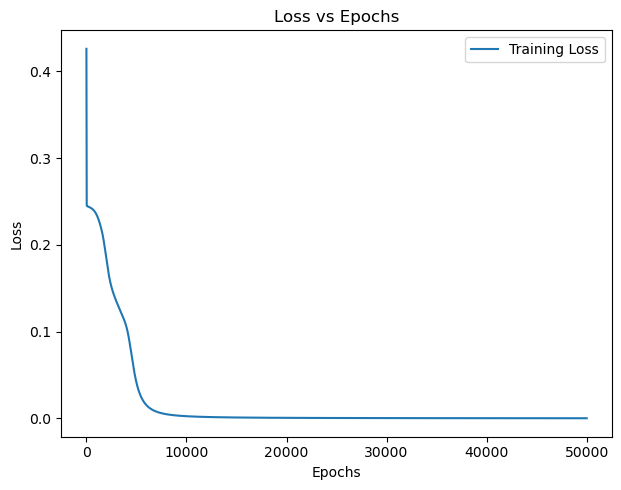

y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 0
y_pred: 1.0       y_true: 1
y_pred: 1.0       y_true: 1
y_pred: 1.0       y_true: 1
y_pred: 0.0       y_true: 0
y_pred: 0.0       y_true: 1


In [181]:
# Example data (X: input, Y: target)
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
Y = np.array([[1],[0],[0],[1],[0],[1],[1],[0]])

data = np.concatenate((X, Y), axis=1)
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1].reshape(-1, 1)

# Initialize and train the network
nn = deepNetwork(input_size=3, hidden_size=4, output_size=1,typ='classify', learning_rate=0.5)
train1(nn, X[:-1], Y[:-1], epochs=50000)


for i in range(8):
    print(f'y_pred: {nn.predict(X[i])[0][0]}       y_true: {Y[i][0]}')

### Data Augmentation

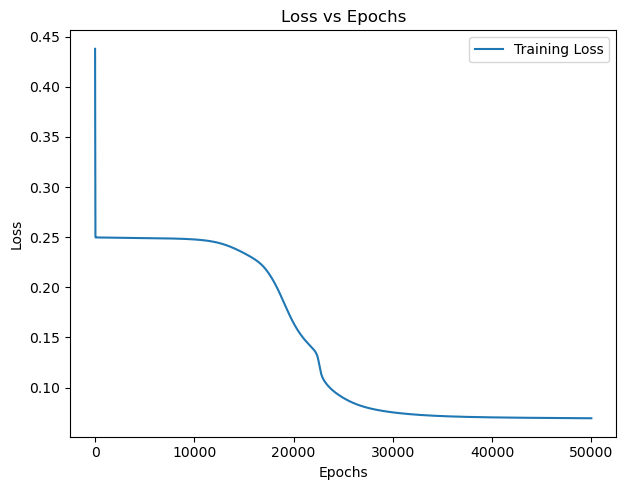

accuracy: 0.86


In [182]:
num_new_samples = 800

# Function to create synthetic data
def generate_synthetic_data(X, Y, num_new_samples):
    synthetic_X = []
    synthetic_Y = []
    
    # Generate new data points by adding random small variations to the existing data
    for _ in range(num_new_samples):
        # Randomly choose an existing data point
        idx = np.random.randint(0, X.shape[0])
        original_x = X[idx]
        original_y = Y[idx]

        # Create a new data point by adding small random variations
        new_x = original_x + np.random.uniform(-0.5, 0.5, size=original_x.shape)
        
        # Ensure the values are clipped between 0 and 1 (as XOR inputs are binary)
        new_x = np.clip(new_x, 0, 1)
        
        synthetic_X.append(new_x)
        synthetic_Y.append(original_y)
    
    return np.array(synthetic_X), np.array(synthetic_Y)

# Generate new synthetic data
synthetic_X, synthetic_Y = generate_synthetic_data(X, Y, num_new_samples)

# Combine the original and synthetic data
X_augmented = np.vstack([X, synthetic_X])
Y_augmented = np.vstack([Y, synthetic_Y])

# Shuffle the augmented dataset
data = np.concatenate((X_augmented, Y_augmented), axis=1)
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1].reshape(-1, 1)

# Initialize and train the network
nn = deepNetwork(input_size=3, hidden_size=4, output_size=1, learning_rate=0.6)
train1(nn, X[:-100], Y[:-100], epochs=50000)

# Predictions
correct = 0
for i in range(1,100):
    y_pred = nn.predict(X[-i])[0][0]
    if y_pred == Y[-i][0]:
        correct += 1
print(f"accuracy: {correct/100}")

# Practice

## 1

<div dir="rtl">
با توجه به صحبت‌های کلاس، پیاده سازی کد در پایتون کافی است.
</div>

## 2

# آ

In [183]:
# Fetch the data
housing = fetch_california_housing()
X = housing.data  # features
y = housing.target  # target prices (regression problem)

# Segment the target prices into 5 bins (classes)
num_bins = 5
y_binned = pd.cut(y, bins=num_bins, labels=[0, 1, 2, 3, 4])
y_binned = y_binned.to_numpy()

# Normalize the input features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_normalized, y_binned, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float64, device='cuda')
X_test_tensor = torch.tensor(X_test, dtype=torch.float64, device='cuda')
X_val_tensor = torch.tensor(X_val, dtype=torch.float64, device='cuda')

y_train_tensor = torch.tensor(y_train, dtype=torch.long, device='cuda')
y_test_tensor = torch.tensor(y_test, dtype=torch.long, device='cuda')
y_val_tensor = torch.tensor(y_val, dtype=torch.long, device='cuda')


# ب

In [184]:

class Linear(object):

    @staticmethod
    def forward(x, w, b):
        """
        Computes the forward pass for an linear (fully-connected) layer.
        The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
        examples, where each example x[i] has shape (d_1, ..., d_k). We will
        reshape each input into a vector of dimension D = d_1 * ... * d_k, and
        then transform it to an output vector of dimension M.
        Inputs:
        - x: A tensor containing input data, of shape (N, d_1, ..., d_k)
        - w: A tensor of weights, of shape (D, M)
        - b: A tensor of biases, of shape (M,)
        Returns a tuple of:
        - out: output, of shape (N, M)
        - cache: (x, w, b)
        """
        N = x.shape[0]
        transform = x.reshape((N, -1))
        out = torch.mm(transform, w) + b
        cache = (x, w, b)
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Computes the backward pass for an linear layer.
        Inputs:
        - dout: Upstream derivative, of shape (N, M)
        - cache: Tuple of:
          - x: Input data, of shape (N, d_1, ... d_k)
          - w: Weights, of shape (D, M)
          - b: Biases, of shape (M,)
        Returns a tuple of:
        - dx: Gradient with respect to x, of shape
          (N, d1, ..., d_k)
        - dw: Gradient with respect to w, of shape (D, M)
        - db: Gradient with respect to b, of shape (M,)
        """
        x, w, b = cache
        dx, dw, db = None, None, None

        N = x.shape[0]

        # Reshape x to (N, D)
        input_vect = x.reshape((N, -1))

        # Gradient with respect to input x
        dx = dout @ w.T
        dx = dx.view(*x.shape)

        # Gradient with respect to weights w
        dw = input_vect.T @ dout

        # Gradient with respect to biases b
        db = dout.sum(dim=0)

        return dx, dw, db


class ReLU(object):

    @staticmethod
    def forward(x):
        """
        Computes the forward pass for a layer of rectified
        linear units (ReLUs).
        Input:
        - x: Input; a tensor of any shape
        Returns a tuple of:
        - out: Output, a tensor of the same shape as x
        - cache: x
        """
        out = x.clamp(min=0)
        cache = x
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Computes the backward pass for a layer of rectified
        linear units (ReLUs).
        Input:
        - dout: Upstream derivatives, of any shape
        - cache: Input x, of same shape as dout
        Returns:
        - dx: Gradient with respect to x
        """
        dx, x = None, cache
        dx = dout.clone()
        dx[x <= 0] = 0
        return dx


class Linear_ReLU(object):

    @staticmethod
    def forward(x, w, b):
        """
        Convenience layer that performs an linear transform
        followed by a ReLU.

        Inputs:
        - x: Input to the linear layer
        - w, b: Weights for the linear layer
        Returns a tuple of:
        - out: Output from the ReLU
        - cache: Object to give to the backward pass
        """
        a, fc_cache = Linear.forward(x, w, b)
        out, relu_cache = ReLU.forward(a)
        cache = (fc_cache, relu_cache)
        return out, cache

    @staticmethod
    def backward(dout, cache):
        """
        Backward pass for the linear-relu convenience layer
        """
        fc_cache, relu_cache = cache
        da = ReLU.backward(dout, relu_cache)
        dx, dw, db = Linear.backward(da, fc_cache)
        return dx, dw, db


class deepNetwork:
    def __init__(self,  hidden_dims, input_dim=8, num_classes=10, reg=0.0, weight_scale=1e-2, dtype=torch.float, device='cpu'):
        self.num_layers = 1 + len(hidden_dims)
        self.reg = reg
        self.dtype = dtype
        self.params = {}

        dims = [input_dim] + hidden_dims + [num_classes]
        for i in range(self.num_layers):
            self.params[f'W{i+1}'] = torch.randn(dims[i], dims[i+1], dtype=dtype, device=device) * weight_scale
            self.params[f'b{i+1}'] = torch.zeros(dims[i+1], dtype=dtype, device=device)
    
    def loss(self, X, y=None):
        """
        Compute loss and gradient for the fully-connected net.
        Inputs:
        - X: Tensor of input data of shape (N, d_1, ..., d_k)
        - y: int64 Tensor of labels, of shape (N,). y[i] gives the
          label for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model
        and return:
        - scores: Tensor of shape (N, C) giving classification scores,
          where scores[i, c] is the classification score for X[i]
          and class c.
        If y is not None, then run a training-time forward and backward
        pass and return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping
          parameter names to gradients of the loss with respect to
          those parameters.
        """
        X = X.to(self.dtype)
        mode = 'test' if y is None else 'train'
        scores = None
        h_out = X
        caches = []  # a list of caches that can be popped in back-prop
        # for the first num_layer - 1, it is Linear-Relu layer
        for i in range(0, self.num_layers - 1):
            w = self.params['W' + str(i + 1)]
            b = self.params['b' + str(i + 1)]
            h_out, cache = Linear_ReLU.forward(h_out, w, b)
            caches.append(cache)

        # then is the last layer
        w = self.params['W' + str(self.num_layers)]
        b = self.params['b' + str(self.num_layers)]
        h_out, cache = Linear.forward(h_out, w, b)

        caches.append(cache)
        scores = h_out

        if mode == 'test':
            return scores
        
        loss, grads = 0.0, {}
        loss, dout = self.compute_loss(scores, y)

        # regularization term
        for i in range(self.num_layers):
            w = self.params['W' + str(i+1)]
            loss += self.reg * torch.sum(w ** 2)

        # for the last layer, it is only Linear forward
        dout, dw, db = Linear.backward(dout, caches.pop())

        grads['W' + str(self.num_layers)] = dw + 2 * self.reg * self.params['W' + str(self.num_layers)]
        grads['b' + str(self.num_layers)] = db

        for i in range(0, self.num_layers-1):
            # go to index 0
            dout, dw, db = Linear_ReLU.backward(dout, caches.pop())
            grads['W' + str(self.num_layers - 1 - i)] = dw + 2 * self.reg * self.params['W' + str(self.num_layers - 1 - i)]
            grads['b' + str(self.num_layers - 1 - i)] = db

        return loss, grads

    def compute_loss(self, scores, y):
        """
        Compute the cross-entropy loss.
        - scores: Raw output from the network (unnormalized logits)
        - y: Ground truth labels
        """
        N = scores.shape[0]
        
        # Compute softmax
        exp_scores = torch.exp(scores - torch.max(scores, dim=1, keepdim=True)[0])  # numerical stability
        probs = exp_scores / torch.sum(exp_scores, dim=1, keepdim=True)
        
        # Compute cross-entropy loss
        correct_logprobs = -torch.log(probs[range(N), y])
        loss = torch.sum(correct_logprobs) / N
        
        # Gradient of loss with respect to scores (softmax gradient)
        dout = probs
        dout[range(N), y] -= 1
        dout /= N

        return loss, dout

    def predict(self, X):
        scores = self.loss(X)
        y_pred = torch.argmax(scores, dim=1)
        return y_pred


def sample_batch(X, y, num_train, batch_size):
    """
    Sample batch_size elements from the training data and their
    corresponding labels to use in this round of gradient descent.
    """
    # Replace "pass" statement with your code
    indices = np.random.randint(0, num_train, (batch_size,))
    X_batch = X[indices, :]
    y_batch = y[indices]
    return X_batch, y_batch


# Plotting function
def plot_training_history(loss_hist, train_acc_history, val_acc_history):    
    plt.figure(figsize=(12, 6))
    
    # Plot loss history
    plt.subplot(1, 2, 1)
    plt.plot(loss_hist, color='red', label='Training Loss')
    plt.title('Loss Over Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True)
    plt.legend(loc='best')
    
    # Plot accuracy history
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, color='blue', label='Training Accuracy')
    plt.plot(val_acc_history, color='green', label='Validation Accuracy')
    plt.title('Accuracy Over Epochs', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()


def nn_train(
    model: deepNetwork,
    X: torch.Tensor,
    y: torch.Tensor,
    X_val: torch.Tensor,
    y_val: torch.Tensor,
    learning_rate: float = 1e-3,
    learning_rate_decay: float = 0.95,
    reg: float = 5e-6,
    num_iters: int = 100,
    batch_size: int = 200,
    verbose: bool = False,
):
    num_train = X.shape[0]
    iterations_per_epoch = max(num_train // batch_size, 1)

    # Use SGD to optimize the parameters in self.model
    loss_history = []
    train_acc_history = []
    val_acc_history = []

    for it in range(num_iters):
        X_batch, y_batch = sample_batch(X, y, num_train, batch_size)

        # Compute loss and gradients using the current minibatch
        loss, grads = model.loss(X_batch, y=y_batch)
        loss_history.append(loss.item())
        # print(loss)

        for param in model.params:
            model.params[param] -= learning_rate * grads[param]

        if verbose and it % 100 == 0:
            print("iteration %d / %d: loss %f" % (it, num_iters, loss.item()))
        
        # Every epoch, check train and val accuracy and decay learning rate.
        if it % iterations_per_epoch == 0:
            # Decay learning rate
            learning_rate *= learning_rate_decay

            y_train_pred = model.loss(X_batch)
            y_train_pred = torch.argmax(y_train_pred, dim=1)
            train_acc = (y_train_pred == y_batch).float().mean().item()

            y_val_pred = model.loss(X_val)
            y_val_pred = torch.argmax(y_val_pred, dim=1)
            val_acc = (y_val_pred == y_val).float().mean().item()
            
            train_acc_history.append(train_acc)
            val_acc_history.append(val_acc)

    return loss_history, train_acc_history, val_acc_history


### 2 layer network

iteration 0 / 8000: loss 1.609232
iteration 100 / 8000: loss 0.978209
iteration 200 / 8000: loss 0.907972
iteration 300 / 8000: loss 0.895495
iteration 400 / 8000: loss 0.894581
iteration 500 / 8000: loss 0.883793
iteration 600 / 8000: loss 0.917668
iteration 700 / 8000: loss 0.840453
iteration 800 / 8000: loss 0.830244
iteration 900 / 8000: loss 0.823118
iteration 1000 / 8000: loss 0.872132
iteration 1100 / 8000: loss 0.849089
iteration 1200 / 8000: loss 0.825029
iteration 1300 / 8000: loss 0.881119
iteration 1400 / 8000: loss 0.827972
iteration 1500 / 8000: loss 0.802291
iteration 1600 / 8000: loss 0.863402
iteration 1700 / 8000: loss 0.772237
iteration 1800 / 8000: loss 0.836138
iteration 1900 / 8000: loss 0.783899
iteration 2000 / 8000: loss 0.799584
iteration 2100 / 8000: loss 0.813916
iteration 2200 / 8000: loss 0.830088
iteration 2300 / 8000: loss 0.841140
iteration 2400 / 8000: loss 0.811930
iteration 2500 / 8000: loss 0.807359
iteration 2600 / 8000: loss 0.768380
iteration 270

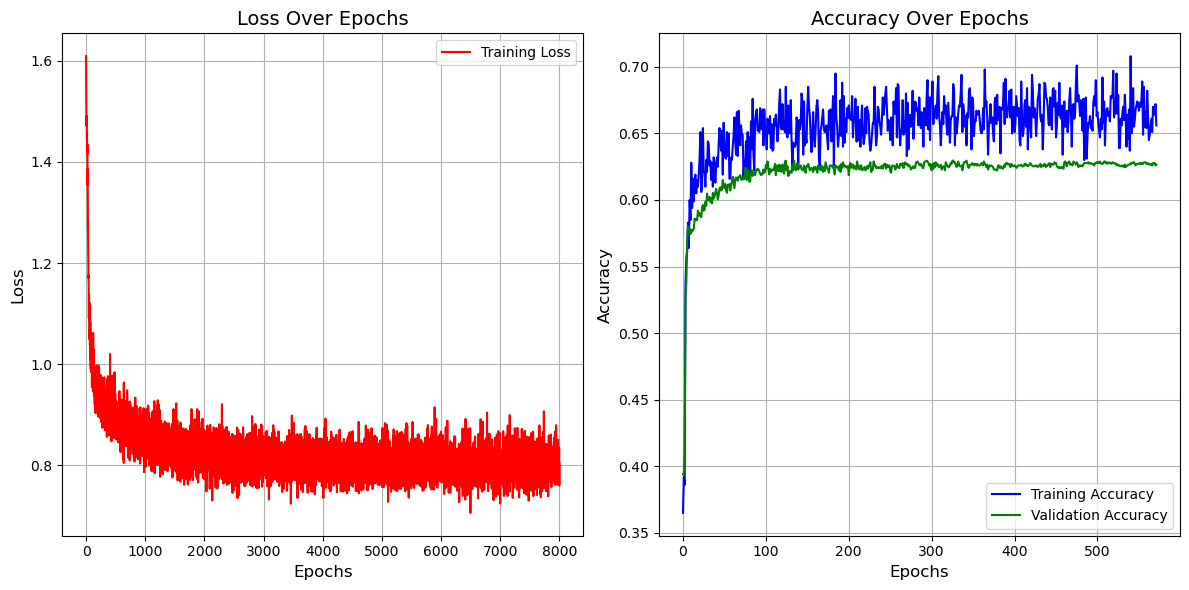

accuracy: 0.6591569781303406


In [185]:
model = deepNetwork(
        [128], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 8000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
y_test_pred = model.loss(X_test_tensor)
y_test_pred = torch.argmax(y_test_pred, dim=1)
val_acc = (y_test_pred == y_test_tensor).float().mean().item()
print(f'accuracy: {val_acc}')

## 3 layer network

iteration 0 / 8000: loss 1.609469
iteration 100 / 8000: loss 1.463462
iteration 200 / 8000: loss 0.956200
iteration 300 / 8000: loss 0.938299
iteration 400 / 8000: loss 0.864204
iteration 500 / 8000: loss 0.904671
iteration 600 / 8000: loss 0.897778
iteration 700 / 8000: loss 0.891679
iteration 800 / 8000: loss 0.865910
iteration 900 / 8000: loss 0.847138
iteration 1000 / 8000: loss 0.855484
iteration 1100 / 8000: loss 0.839788
iteration 1200 / 8000: loss 0.811026
iteration 1300 / 8000: loss 0.818872
iteration 1400 / 8000: loss 0.787929
iteration 1500 / 8000: loss 0.774132
iteration 1600 / 8000: loss 0.823645
iteration 1700 / 8000: loss 0.760133
iteration 1800 / 8000: loss 0.796860
iteration 1900 / 8000: loss 0.801200
iteration 2000 / 8000: loss 0.809575
iteration 2100 / 8000: loss 0.781350
iteration 2200 / 8000: loss 0.779961
iteration 2300 / 8000: loss 0.781297
iteration 2400 / 8000: loss 0.775617
iteration 2500 / 8000: loss 0.755567
iteration 2600 / 8000: loss 0.791212
iteration 270

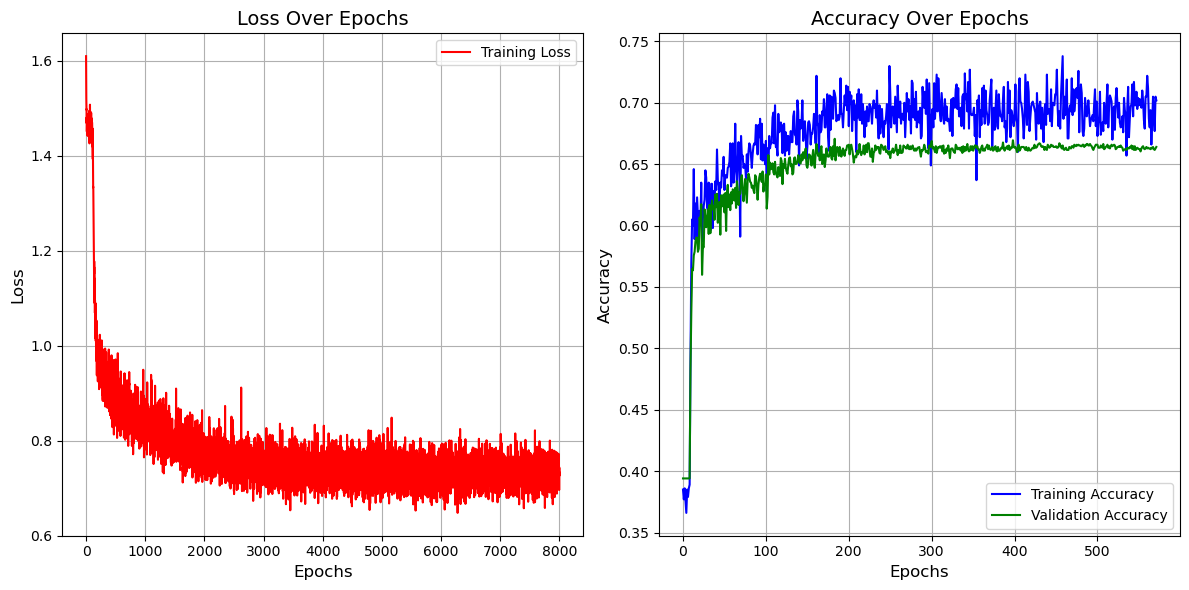

accuracy: 0.6770833134651184


In [186]:
model = deepNetwork(
        [128,128], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 8000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
y_test_pred = model.loss(X_test_tensor)
y_test_pred = torch.argmax(y_test_pred, dim=1)
val_acc = (y_test_pred == y_test_tensor).float().mean().item()
print(f'accuracy: {val_acc}')

## 4 layer network

iteration 0 / 8000: loss 1.609435
iteration 100 / 8000: loss 1.450677
iteration 200 / 8000: loss 1.475096
iteration 300 / 8000: loss 1.470042
iteration 400 / 8000: loss 1.446558
iteration 500 / 8000: loss 1.457464
iteration 600 / 8000: loss 1.456294
iteration 700 / 8000: loss 1.441142
iteration 800 / 8000: loss 1.196259
iteration 900 / 8000: loss 1.015869
iteration 1000 / 8000: loss 0.941989
iteration 1100 / 8000: loss 0.933372
iteration 1200 / 8000: loss 0.892297
iteration 1300 / 8000: loss 0.887938
iteration 1400 / 8000: loss 1.017495
iteration 1500 / 8000: loss 0.846489
iteration 1600 / 8000: loss 0.848304
iteration 1700 / 8000: loss 0.852600
iteration 1800 / 8000: loss 0.814001
iteration 1900 / 8000: loss 0.869548
iteration 2000 / 8000: loss 0.916566
iteration 2100 / 8000: loss 0.859103
iteration 2200 / 8000: loss 0.785528
iteration 2300 / 8000: loss 0.876213
iteration 2400 / 8000: loss 0.816951
iteration 2500 / 8000: loss 0.789663
iteration 2600 / 8000: loss 0.813064
iteration 270

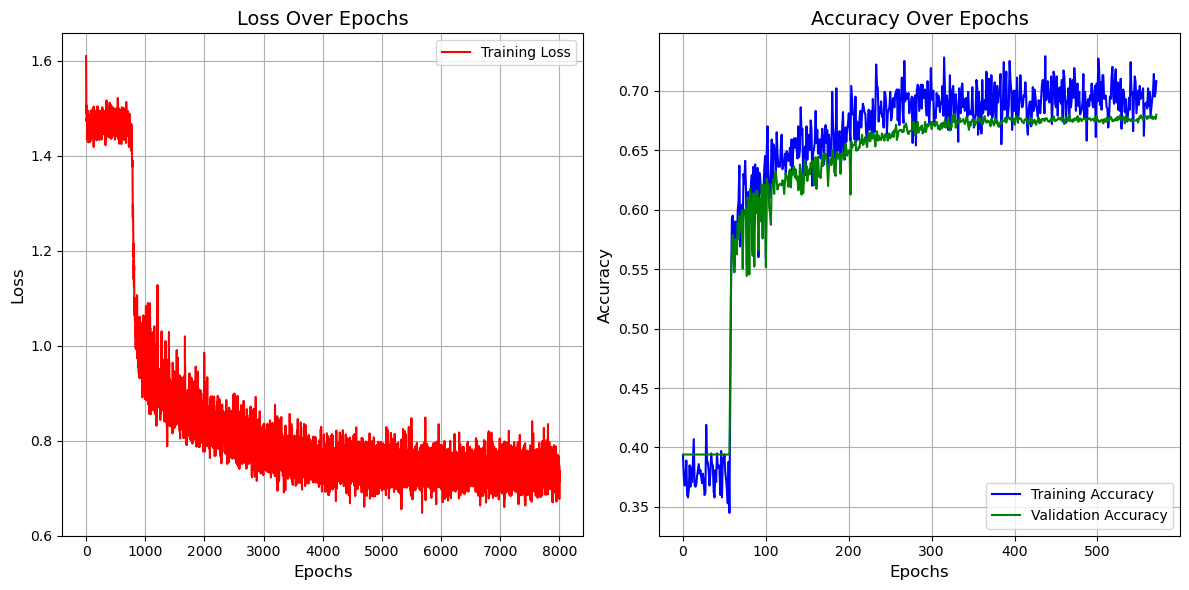

accuracy: 0.6848352551460266


In [187]:
model = deepNetwork(
        [128,128,128], 
        input_dim=8,
        num_classes=5,
        reg=0,
        weight_scale=1e-2,
        dtype=torch.float64, 
        device='cuda'
  )
lr = 0.6
lrd = 0.99
reg = 0
batch_size = 1000
epochs = 8000

loss_history, train_acc_history, val_acc_history = nn_train(model, X_train_tensor, y_train_tensor,
                                                             X_val_tensor, y_val_tensor, lr, lrd, reg,
                                                               epochs, batch_size, verbose=True)

plot_training_history(loss_history, train_acc_history, val_acc_history)

y_test_pred = model.loss(X_test_tensor)
y_test_pred = model.loss(X_test_tensor)
y_test_pred = torch.argmax(y_test_pred, dim=1)
val_acc = (y_test_pred == y_test_tensor).float().mean().item()
print(f'accuracy: {val_acc}')

#### افزایش تعداد لایه از یکجایی به بعد تاثیری در افزایش دقت ندارد. 

# 3

In [201]:
# Define the deep neural network using PyTorch's nn.Module
class DeepNetwork(torch.nn.Module):
    def __init__(self, input_dim=8, hidden_dims=[128, 128, 128], num_classes=5):
        super(DeepNetwork, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims
        
        # Build the hidden layers
        for i in range(len(dims) - 1):
            layers.append(torch.nn.Linear(dims[i], dims[i + 1], dtype=torch.float64))
            layers.append(torch.nn.ReLU())
        
        # Output layer
        layers.append(torch.nn.Linear(dims[-1], num_classes, dtype=torch.float64))
        
        # Sequentially stack the layers
        self.model = torch.nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

def train_model(model, optimizer, loss_fn, X_train, y_train, X_val, y_val, num_epochs=8000, batch_size=1000, learning_rate_decay=0.99):
    loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    num_train = X_train.shape[0]
    for epoch in range(num_epochs):
        # Mini-batch sampling
        indices = np.random.choice(num_train, batch_size, replace=False)
        X_batch = X_train[indices].cuda()
        y_batch = y_train[indices].cuda()
        
        # Forward pass
        model.train()
        outputs = model(X_batch)
        loss = loss_fn(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Record the loss
        loss_history.append(loss.item())
        
        # Check training and validation accuracy
        if (epoch + 1) % (num_train // batch_size) == 0:
            with torch.no_grad():
                model.eval()
                train_preds = torch.argmax(model(X_train.cuda()), dim=1)
                train_acc = (train_preds == y_train.cuda()).float().mean().item()
                train_acc_history.append(train_acc)
                
                val_preds = torch.argmax(model(X_val.cuda()), dim=1)
                val_acc = (val_preds == y_val.cuda()).float().mean().item()
                val_acc_history.append(val_acc)
            
            # Decay learning rate
            for g in optimizer.param_groups:
                g['lr'] *= learning_rate_decay
            
    return loss_history, train_acc_history, val_acc_history

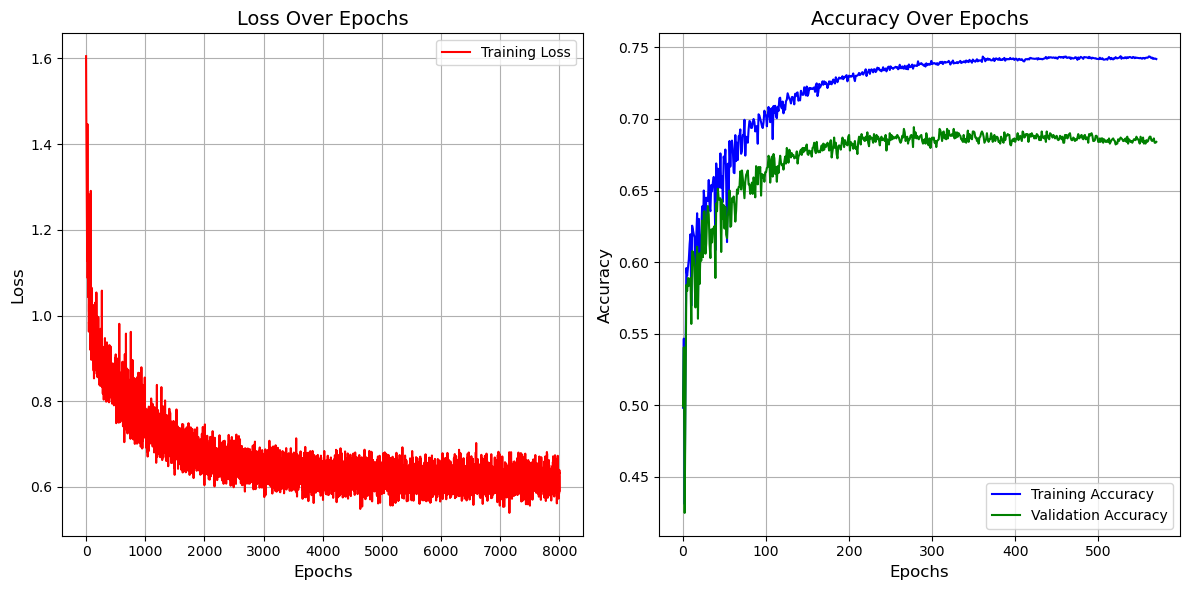

Test accuracy: 0.7022771239280701


In [202]:
# Initialize the model, loss function, and optimizer
model = DeepNetwork(input_dim=8, hidden_dims=[128, 128, 128], num_classes=5).cuda()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.6)

# Training parameters
epochs = 8000
batch_size = 1000
lr = 0.6
lrd = 0.99

# Train the model
loss_history, train_acc_history, val_acc_history = train_model(
    model, 
    optimizer,
    loss_fn,
    X_train_tensor, y_train_tensor, 
    X_val_tensor, y_val_tensor, 
    num_epochs=epochs, 
    batch_size=batch_size, 
    learning_rate_decay=lrd
)

# Plot training history
plot_training_history(loss_history, train_acc_history, val_acc_history)

# Test the model
model.eval()
with torch.no_grad():
    y_test_pred = torch.argmax(model(X_test_tensor.cuda()), dim=1)
    test_acc = (y_test_pred == y_test_tensor.cuda()).float().mean().item()

print(f'Test accuracy: {test_acc}')